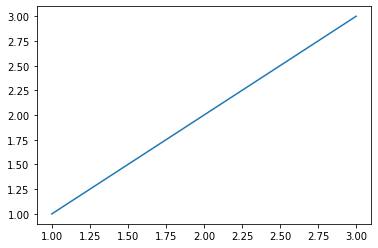

In [1]:
'''
기존에 matplotlib 쓸 때에,

import matplotlib.pyplot as plt

~~~
~~~

plt.plot()
이라고 입력하게 되면

실제, 내부적으론 figure 객체가 생성되고
이 과정에 내부에서 Axes도 같이 생성된다.

이렇게 한번에 자동생성 되는 것을 피하기 위해 아래와 같이 진행해 보자
'''

import matplotlib.pyplot as plt

x = [1, 2, 3]
y = [1, 2, 3]

fig = plt.figure() # figure객체만 따로 생성

ax = plt.axes() # axes는 따로 생성해 줌, figure에 축을 추가해주는 함수

plt.plot(x, y) # figure와 axes가 이미 생성되어 있어서, 입력값에 대한 처리만 진행

plt.show()

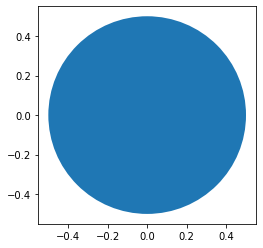

In [2]:
# 위의 내용을 더 자세히 이해하기 위한 예시 프로그램을 살펴 보자

# Example of using matplotlib's Circle patch

import matplotlib.pyplot as plt

def create_circle():
    circle = plt.Circle((0, 0), radius = 0.5)
    return circle

def show_shape(patch):
    ax = plt.gca() # Get Current Axes
    ax.add_patch(patch) # 도형을 추가하는데 사용하는 add_patch() 함수
    plt.axis("scaled")
    plt.show()

c = create_circle()
show_shape(c)

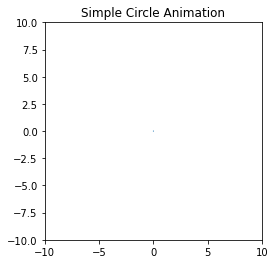

In [4]:
# 원이 점점 커지는 애니메이션을 만들어보자

'''
A growing circle
'''

from matplotlib import pyplot as plt
from matplotlib import animation

def create_circle():
    circle = plt.Circle((0, 0), 0.05)
    return circle

def update_radius(i, circle):
    circle.radius = i * 0.5 # i: frame number, -> 30 프레임마다 0.5가 곱해지는 형태가 될 것 -> max radius가 15까지 감
    return circle

def create_animation():
    fig = plt.gcf() # Get Current Figure
    ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
    ax.set_aspect('equal')
    circle = create_circle()
    ax.add_patch(circle)

    anim = animation.FuncAnimation(fig, update_radius, fargs = (circle,), frames=30, interval=50)
    
    plt.title('Simple Circle Animation')
    plt.show()

create_animation()

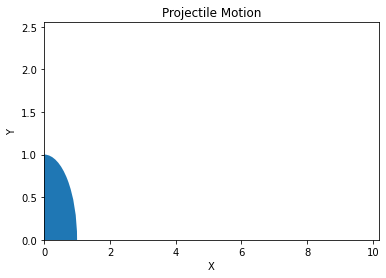

In [7]:
'''
Animate the trajectory of an object in projectile motion
'''

from matplotlib import pyplot as plt
from matplotlib import animation
import math

g = 9.8

def get_intervals(u, theta):
    t_flight = 2 * u * math.sin(theta)/g
    
    intervals = []
    start = 0
    interval = 0.005

    while start < t_flight:
        intervals.append(start)
        start = start + interval
    
    return intervals

def update_position(i, circle, intervals, u, theta):
    t = intervals[i]
    x = u * math.cos(theta) * t
    y = u * math.sin(theta) * t - 0.5 * g * t**2
    circle.center = x, y
    
    return circle

def create_animation(u, theta):
    intervals = get_intervals(u, theta)

    xmin = 0
    xmax = u * math.cos(theta) * intervals[-1]
    ymin = 0
    t_max = u * math.sin(theta)/g
    ymax = u * math.sin(theta) * t_max - 0.5 * g * t_max**2
    fig = plt.gcf()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
    circle = plt.Circle((xmin, ymin), 1.0)
    ax.add_patch(circle)

    anim = animation.FuncAnimation(fig, update_position, fargs=(circle, intervals, u, theta), frames=len(intervals), interval=1, repeat=False)
 
    plt.title('Projectile Motion')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

try:
    u = 10
    theta = 45
except ValueError:
    print("Error")
else:
    theta = math.radians(theta)
    create_animation(u, theta)

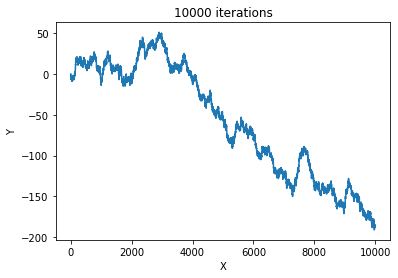

In [31]:
'''
점 Q가 (1, -1)또는 (1, 1) 만큼 지속적으로 이동하도록 구현
'''

import matplotlib.pyplot as plt
import random

def transformation_1(p):
    x = p[0]
    y = p[1]
    return x+1, y-1

def transformation_2(p):
    x = p[0]
    y = p[1]
    return x+1, y+1

def transform(p):
    # List of transformation functions
    transformations = [transformation_1, transformation_2]

    # Pick a random transformation function and call it
    t = random.choice(transformations)
    
    x, y = t(p)

    return x, y

def build_trajectory(p, n):
    x = [p[0]]
    y = [p[1]]

    for i in range(n):
        p = transform(p)
        x.append(p[0])
        y.append(p[1])

    return x, y

# Initial point
p = (0, 0)
n = 10000
x, y = build_trajectory(p, n)

# Plot
plt.plot(x, y)
plt.title('Fern with {0} points'.format(n))
plt.title(f"{n} iterations")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

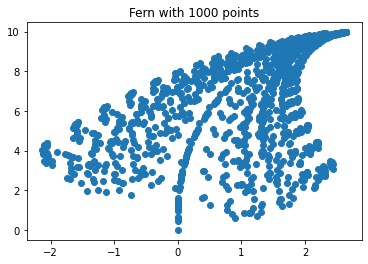

In [32]:
'''
Draw a Barnsley Fern
'''
import random
import matplotlib.pyplot as plt

def transformation_1(p):
    x = p[0]
    y = p[1]
    x1 = 0.85*x + 0.04*y
    y1 = -0.04*x + 0.85*y + 1.6

    return x1, y1

def transformation_2(p):
    x = p[0]
    y = p[1]
    x1 = 0.2*x - 0.26*y
    y1 = 0.23*x + 0.22*y + 1.6

    return x1, y1

def transformation_3(p):
    x = p[0]
    y = p[1]
    x1 = -0.15*x + 0.28*y
    y1 = 0.26*x + 0.24*y + 0.44
    
    return x1, y1

def transformation_4(p):
    x = p[0]
    y = p[1]
    x1 = 0
    y1 = 0.16*y
    
    return x1, y1

def get_index(probability):
    r = random.random()
    c_probability = 0
    sum_probability = []
    
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    
    for item, sp in enumerate(sum_probability):
        if r <= sp:
            return item
    
    return len(probability)-1

def transform(p):
    # List of transformation functions
    transformations = [transformation_1, transformation_2, transformation_3, transformation_4]
    probability = [0.85, 0.07, 0.07, 0.01]

    # Pick a random transformation function and call it
    tindex = get_index(probability)
    t = transformations[tindex]
    x, y = t(p)
    
    return x, y

def draw_fern(n):
    # We start with (0, 0)
    x = [0]
    y = [0]
    x1, y1 = 0, 0
    for i in range(n):
        x1, y1 = transform((x1, y1))
        x.append(x1)
        y.append(y1)

    return x, y

n = 1000
x, y = draw_fern(n)

# Plot the points
plt.plot(x, y, 'o')
plt.title('Fern with {0} points'.format(n))
plt.show()